In [1]:
!pip install astropy --upgrade
!pip install photutils

import numpy as np
import math
import matplotlib.pyplot as plt
import os
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
import glob
import warnings
warnings.filterwarnings("ignore")
from matplotlib.gridspec import GridSpec


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
bias_list = glob.glob('C:/Users/jimmy/OneDrive/Astron100/Day1/Bias/*BIAS*.fits')

science_list = glob.glob('C:/Users/jimmy/OneDrive/Astron100/Day1/Science/*0051.OJ287*.fits')

flat_list = glob.glob('C:/Users/jimmy/OneDrive/Astron100/Day1/Flats/*FLAT*.fits')

print(bias_list)
print(flat_list)
print(science_list)

['C:/Users/jimmy/OneDrive/Astron100/Day1/Bias\\0001.BIAS.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Bias\\0002.BIAS.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Bias\\0003.BIAS.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Bias\\0004.BIAS.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Bias\\0005.BIAS.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Bias\\0006.BIAS.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Bias\\0007.BIAS.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Bias\\0008.BIAS.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Bias\\0009.BIAS.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Bias\\0010.BIAS.fits']
['C:/Users/jimmy/OneDrive/Astron100/Day1/Flats\\0011.FLAT.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Flats\\0012.FLAT.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Flats\\0013.FLAT.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Flats\\0014.FLAT.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Flats\\0015.FLAT.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Flats\\0

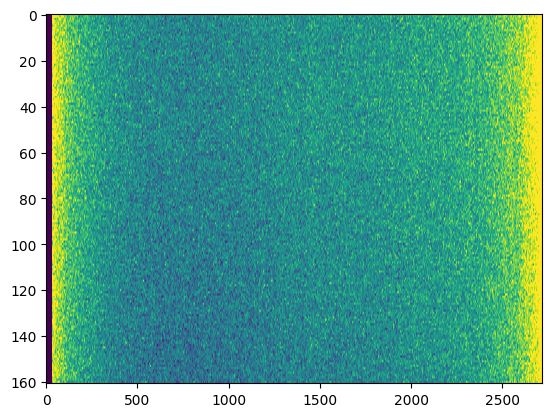

In [3]:
bias = glob.glob('C:/Users/jimmy/OneDrive/Astron100/Day1/Bias/*BIAS*.fits')

master_bias = []

for i in bias:
  data = fits.getdata(i)
  master_bias.append(data[None])

master_bias = np.concatenate(master_bias, axis = 0)
master_bias = np.median(master_bias, axis = 0)

plt.imshow(master_bias, vmax = np.percentile(master_bias, 90),
          vmin = np.percentile(master_bias, 5),
          aspect = 'auto')

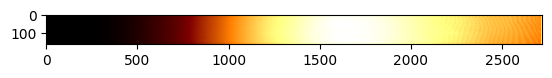

In [4]:
flats = glob.glob('C:/Users/jimmy/OneDrive/Astron100/Day1/Flats/*FLAT*.fits')

master_flat = []

for m in flats:
  data = fits.getdata(m)
  data = data - master_bias
  master_flat.append(data[None])

master_flat = np.concatenate(master_flat, axis = 0)
master_flat = np.median(master_flat, axis = 0)

plt.imshow(master_flat, vmax = np.percentile(master_flat, 99),
           vmin = np.percentile(master_flat, 10),
           cmap = 'afmhot')

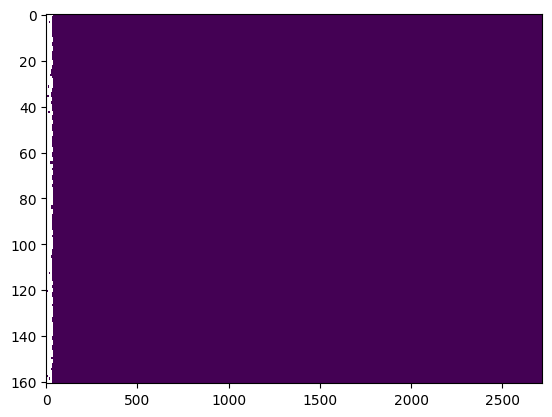

In [5]:
science = fits.getdata(science_list[0])
final = (science - master_bias) / master_flat

plt.imshow(final, vmax = np.percentile(final, 90),
          vmin = np.percentile(final, 5),
          aspect = 'auto')

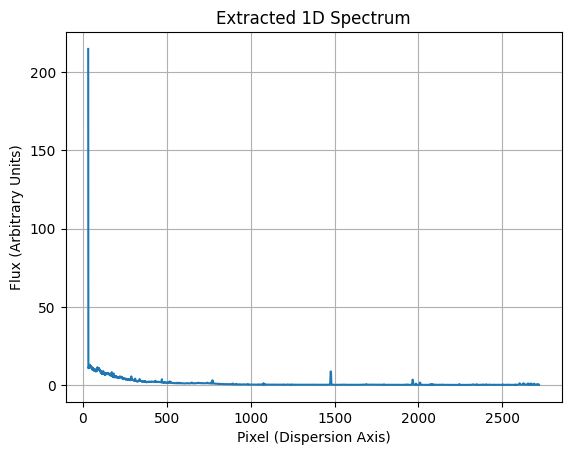

In [6]:
spectrum_1d = np.sum(final, axis=0)  # Sum over the spatial axis (rows)
plt.plot(spectrum_1d)
plt.xlabel("Pixel (Dispersion Axis)")
plt.ylabel("Flux (Arbitrary Units)")
plt.title("Extracted 1D Spectrum")
plt.grid()
plt.show()

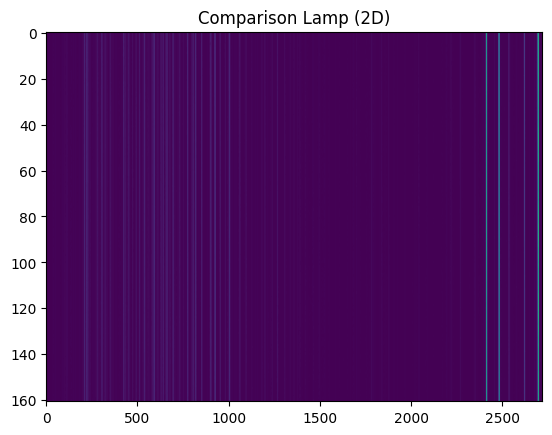

In [7]:
comp_path = 'C:/Users/jimmy/OneDrive/Astron100/Day1/Comp/0052.COMP_OJ287.fits'
comp_data = fits.getdata(comp_path)

# Basic visualization
plt.imshow(comp_data, aspect='auto', cmap='viridis')
plt.title('Comparison Lamp (2D)')
plt.show()

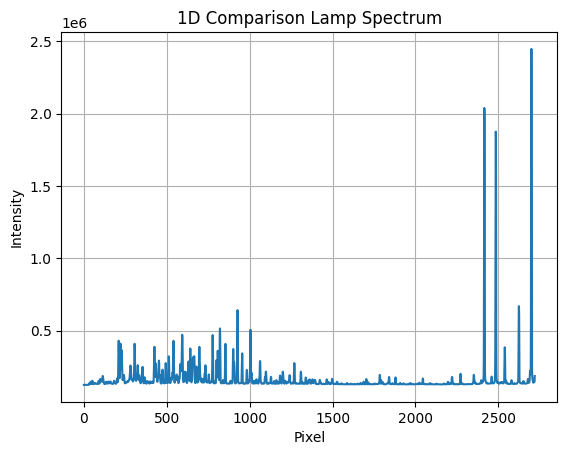

In [8]:
comp_spectrum_1d = np.sum(comp_data, axis=0)
plt.plot(comp_spectrum_1d)
plt.title('1D Comparison Lamp Spectrum')
plt.xlabel('Pixel')
plt.ylabel('Intensity')
plt.grid()
plt.show()

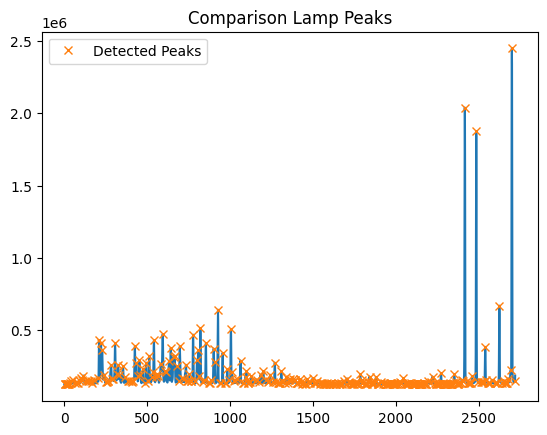

In [9]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(comp_spectrum_1d, height=1000)  # tune height threshold
plt.plot(comp_spectrum_1d)
plt.plot(peaks, comp_spectrum_1d[peaks], "x", label='Detected Peaks')
plt.legend()
plt.title("Comparison Lamp Peaks")
plt.show()

In [10]:
pixel_vals = np.array([153, 278, 398])
wave_vals = np.array([5460, 5769, 6143])

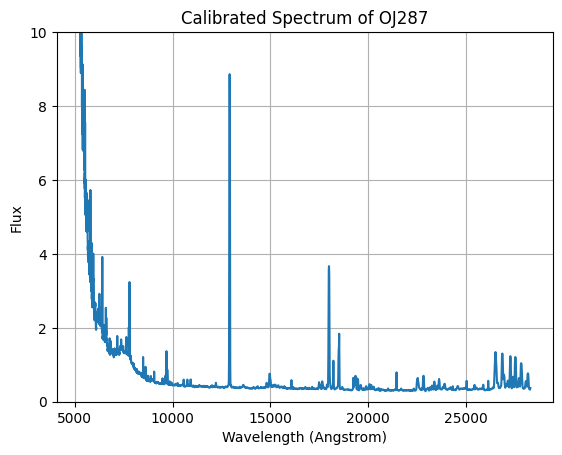

In [11]:
coeffs = np.polyfit(pixel_vals, wave_vals, deg=2)
wavelength_solution = np.poly1d(coeffs)

# Apply to the science spectrum
pixels = np.arange(len(spectrum_1d))  # from your science data
wavelength = wavelength_solution(pixels)

# Plot wavelength-calibrated spectrum
plt.plot(wavelength, spectrum_1d)
plt.xlabel("Wavelength (Angstrom)")
plt.ylabel("Flux")
plt.title("Calibrated Spectrum of OJ287")
plt.grid()
plt.ylim(0, 10)  # Set y-axis limits
plt.show()
